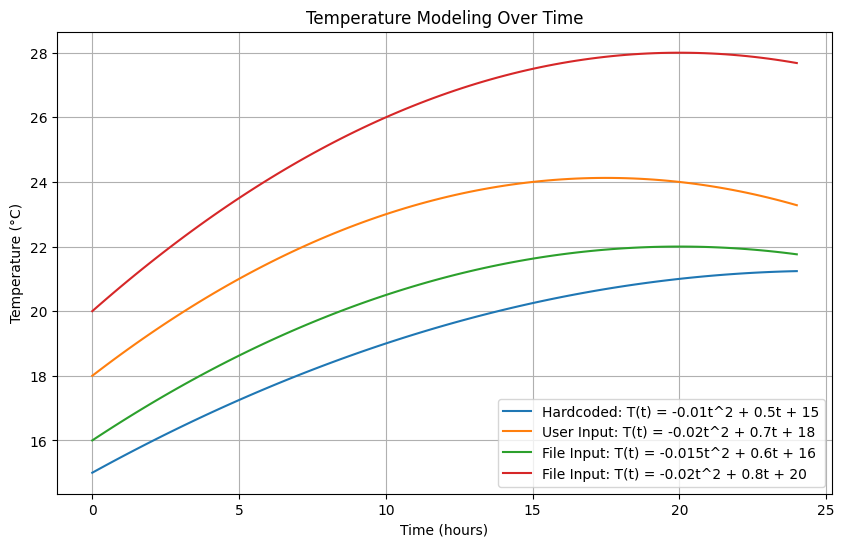

Results saved to: ./output_data/temperature_results.json
Plot saved to: ./output_data/temperature_model_plot.png


In [1]:



import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Function to compute quadratic values for temperature modeling
def temperature_model(a, b, c, t_range):
    t = np.linspace(t_range[0], t_range[1], 100)
    T = a * t**2 + b * t + c
    return t, T

# Function to save data to a file
def save_to_file(data, filename):
    output_dir = './output_data/'
    os.makedirs(output_dir, exist_ok=True)
    file_path = os.path.join(output_dir, filename)
    with open(file_path, 'w') as f:
        json.dump(data, f)
    return file_path

# Function to plot and save graph
def plot_graph(data, title, xlabel, ylabel, filename):
    plt.figure(figsize=(10, 6))
    for t, T, label in data:
        plt.plot(t, T, label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    output_dir = './output_data/'
    os.makedirs(output_dir, exist_ok=True)
    plot_path = os.path.join(output_dir, filename)
    plt.savefig(plot_path)
    plt.show()
    return plot_path

# Stage 1: Hardcoded example
hardcoded_coeffs = (-0.01, 0.5, 15)  # Example: T(t) = -0.01t^2 + 0.5t + 15
t_range = (0, 24)  # Time range for temperature observation (24 hours)
t1, T1 = temperature_model(*hardcoded_coeffs, t_range)

# Stage 2: User input (simulated)
user_coeffs = (-0.02, 0.7, 18)  # Example: T(t) = -0.02t^2 + 0.7t + 18
t2, T2 = temperature_model(*user_coeffs, t_range)

# Stage 3: Read from file (simulated list of inputs)
file_inputs = [
    {"a": -0.015, "b": 0.6, "c": 16},  # Example 1: T(t) = -0.015t^2 + 0.6t + 16
    {"a": -0.02, "b": 0.8, "c": 20},   # Example 2: T(t) = -0.02t^2 + 0.8t + 20
]

data_to_plot = [
    (t1, T1, f"Hardcoded: T(t) = {hardcoded_coeffs[0]}t^2 + {hardcoded_coeffs[1]}t + {hardcoded_coeffs[2]}"),
    (t2, T2, f"User Input: T(t) = {user_coeffs[0]}t^2 + {user_coeffs[1]}t + {user_coeffs[2]}"),
]

results = []
for coeffs in file_inputs:
    t, T = temperature_model(coeffs["a"], coeffs["b"], coeffs["c"], t_range)
    results.append({"t": t.tolist(), "T": T.tolist()})
    data_to_plot.append((t, T, f"File Input: T(t) = {coeffs['a']}t^2 + {coeffs['b']}t + {coeffs['c']}"))

# Save results
results_file = save_to_file(results, "temperature_results.json")

# Plot all results
plot_file = plot_graph(
    data_to_plot,
    "Temperature Modeling Over Time",
    "Time (hours)",
    "Temperature (°C)",
    "temperature_model_plot.png"
)

print(f"Results saved to: {results_file}")
print(f"Plot saved to: {plot_file}")